## Simulazione dell'esame di Metodi Numerici


# Esercizio 1
Nel file ``testI.mat`` sono memorizzati la matrice A ed il vettore b. 

 - Verificare che per risolvere il sistema Ax=b sia possibile utilizzare i due metodi di discesa visti a lezione. Richiamare il teorema che  garantisce che risolvere un sistema lineare con specifiche proprietà equivale a trovare il minimo di un opportuni funzionale quadratico.  [**Punti 2**]
 - implementare entrambi gli algoritmi e dire quante iterazioni sono necessarie per ciascuno di essi  per calcolare la soluzione con una toll=1e-6 e maxit=4000. Visualizzare in un grafico l'errore in scala logaritmica ad ogni iterazione per ciascuno dei due metodi. [**Punti 5**]
 - Verificare se la matrice è  malcondizionata, dire teoricamente cosa questo implica in termini di velocità di  convergenza alla soluzione di ciascuno dei due metodi, richiamando il risultato teorico visto a lezione. [**Punti 2**]

 - Costruire la matrice A1, ottenuta a partire da A sommandole una matrice diagonale con elementi sulla
      diagonali tutti uguali a 0.05
   nel seguente modo:
   
   A1=A+np.eye(A.shape[0])*0.05
   
   e termine noto b1, costruito in maniera tale che la soluzione del sistema A1 x1 =b1 sia il vettore formato da tutti 1.  Risolvere il sistema lineare con matrice dei coefficienti A1 e termine noto b1, sia con il metodo del gradiente che con il metodo del gradiente coniugato. Osservare il numero di iterazioni eseguito da ciascun metodo e giustificare i risultati  [**Punti 2**]
  
   **Totale: Punti 11**

Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('testI.mat')``

``A=dati["A"] ``

``A=A.astype(float)``

`` b=dati["b"] ``

`` b=b.astype(float)``







In [2]:
from scipy.io import loadmat
import numpy as np
import numpy.linalg as npl

dati = loadmat('testI.mat')
A=dati["A"]
A=A.astype(float)
b=dati["b"]
b=b.astype(float)

In [3]:
"""
Verificare che per risolvere il sistema Ax=b sia possibile utilizzare 
i due metodi di discesa visti a lezione. 
Richiamare il teorema che garantisce che risolvere un sistema lineare con specifiche proprietà 
equivale a trovare il minimo di un opportuni funzionale quadratico.  [**Punti 2**]
"""

# matrice deve essere simmetrica e definita positiva
print(f'Dimensioni matrice: {A.shape}')
print(f'Matrice ben condizionata? {npl.cond(A) < 100}')
if np.all(A == A.T): # .all testa che 
    print(f'La matrice è simmetrica')
    if np.all(npl.eigvals(A)>0):
        print(f'La matrice è definita positiva')
else:
    print(f'La matrice non è adatta ai metodi di discesa')
n,m = A.shape
print(f'La matrice è sparsa? {(np.count_nonzero(A)*100)/(n*m)} %')

Dimensioni matrice: (300, 300)
Matrice ben condizionata? False
La matrice è simmetrica
La matrice è definita positiva
La matrice è sparsa? 9.524444444444445 %


Il teorema è il seguente: data A matrice quadrata, simmetrica e definita positiva, allora la soluzione del sistema lineare Ax = b coincide con il punto di minimo della funzione quadratica F(x) = 1/2 <Ax, x> - <b, x>. In altre parole, risolveere tale sistema equivale a minimizzare la funzione. 
La dimostrazione si basa sui concetti di residuo, gradiente e punto di minimo di una funzione convessa (tramitee matrice Hessiana). 
Il vettore residuo è r = Ax - b- Se x* è soluzione, allora r = Ax* - b = 0.
Si calcola il gradiente per cercare il minimo, infatti lo si pone = 0. Risulta che il vettore che annulla il gradiente coincide con la soluzione del sistema lineare.
Si verifica che tale punto è di minimo per mezzo della matrice Hessiana. Avendo una funzione quadratica, simmetrica e definita positiva, tale matrice coincide con A. Da ciò, F è convessa, quindi ha un solo punto di minimo (quello trovato).

In [4]:
itmax = 4000
tol=1e-6
x0=np.array([[0]*n]).T

In [5]:
"""
implementare entrambi gli algoritmi e dire quante iterazioni sono necessarie per ciascuno di essi 
per calcolare la soluzione con una toll=1e-6 e maxit=4000. 
Visualizzare in un grafico l'errore in scala logaritmica ad ogni iterazione per ciascuno dei due metodi. [**Punti 5**]
"""
def steepestdescent(A,b,x0,itmax,tol):
    # metodo del gradiente per una matrice simmetrica e definita positiva
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
   # inizializzare le variabili necessarie
    x = x0
    r = A@x-b
    p = -r 
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x)
    vet_r=[]
    vet_r.append(errore)
     
# utilizzare il metodo del gradiente per trovare la soluzione
    while errore >= tol and it < itmax:
        it=it+1
        Ap = A@p 
        alpha = -(r.T @ p) / (p.T @ Ap)                
        x = x + alpha * p
        vec_sol.append(x)
        r=r+alpha*Ap
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p = -r        
     
    return x,vet_r,vec_sol,it


def conjugate_gradient(A,b,x0,itmax,tol):
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    
    x = x0    
    r = A@x-b
    p = -r
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x0)
    vet_r=[]
    vet_r.append(errore)
# utilizzare il metodo del gradiente coniugato per calcolare la soluzione
    while errore >= tol and it< itmax:
        it=it+1
        Ap = A@p 
        alpha = -(r.T @ p) / (p.T @ Ap)
        x = x + alpha * p
        vec_sol.append(x)
        rtr_old=r.T@r
        r=r+alpha*Ap
        gamma = (r.T @ r) / rtr_old 
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p = -r + gamma * p
   
    
    return x,vet_r,vec_sol,it

In [6]:
x_steepest, vet_r_steepest, vec_sol_steepest ,it_steepest = steepestdescent(A, b, x0, itmax, tol)
x_congiunto, vet_r_congiunto, vec_sol_congiunto, it_congiunto = conjugate_gradient(A, b, x0, itmax, tol)
print(f'iterazioni steepest descent = {it_steepest}, iterazioni gradiente congiunto = {it_congiunto}')

iterazioni steepest descent = 4000, iterazioni gradiente congiunto = 326


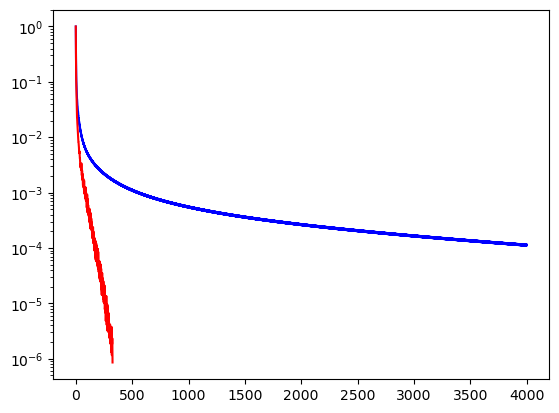

In [7]:
# Visualizzo l'errore in scala logaritmica
import matplotlib.pyplot as plt
plt.semilogy(vet_r_steepest, '-b', vet_r_congiunto, '-r')
plt.show()

In [8]:
"""
Verificare se la matrice è malcondizionata, dire teoricamente cosa questo implica in termini di velocità di convergenza alla soluzione di ciascuno dei due metodi,
richiamando il risultato teorico visto a lezione. [**Punti 2**]
"""
print(f'Matrice mal condizionata? {npl.cond(A) > 100}')

Matrice mal condizionata? True


Essendo i metodi di discesa metodi iterativi, la velocità di convergenza dipende dagli autovalori. Se la matrice è mal condizionata, gli autovalori sono distribuiti in maniera tale da rallentare la convergenza. 

In [9]:
""" 
Costruire la matrice A1, ottenuta a partire da A sommandole una matrice diagonale con 
elementi sulla diagonali tutti uguali a 0.05, nel seguente modo:
   
   A1=A+np.eye(A.shape[0])*0.05
   
e termine noto b1, costruito in maniera tale che la soluzione del sistema A1 x1 = b1 sia il vettore formato da tutti 1.
Risolvere il sistema lineare con matrice dei coefficienti A1 e termine noto b1, sia con il metodo del gradiente che con il metodo del gradiente coniugato. 
Osservare il numero di iterazioni eseguito da ciascun metodo e giustificare i risultati  [**Punti 2**]
"""
A1 = A + np.eye(A.shape[0])*0.05
b1 = np.sum(A1,axis=1) # axis = 1: sommo le righe
x1_st, vet_r_st, vet_sol_st, it_st = steepestdescent(A1, b1, x0, itmax, tol)
x1_con, vet_r_con, vec_sol_con, it_con = conjugate_gradient(A1, b1, x0, itmax, tol)
print(f'iterazioni steepest descent = {it_st}, iterazioni conjugate gradient = {it_con}')
print(f'A1 è una matrice ben condizionata? {npl.cond(A1) < 100}')

iterazioni steepest descent = 166, iterazioni conjugate gradient = 37
A1 è una matrice ben condizionata? True


La matrice A1 è ben condizionata, quindi la velocità di convergenza è maggiore. Di conseguenza, il numero di iterazioni è nettamente inferiore. 

## Esercizio 2 ##

Siano assegnati i numpy array

x =[1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0] 

y =[1.18,1.26,1.23,1.37,1.37,1.45,1.42,1.46,1.53,1.59,1.59] 
                                                               
contenenti rispettivamente le ascisse e le ordinate di 11 punti nel piano.                                                          

Scrivere lo script python in cui:

In [10]:
import SolveTriangular
import numpy.linalg as npl

- si calcola il polinomio di approssimazione ai minimi quadrati di grado 1 dei punti assegnati, sviluppando le functions necessarie. e lo si valuti su 200 punti equidistanti nell'intervallo [1,3]  [**Punti: 4**]

In [20]:
# Funzione per la risoluzione del problema dei minimi quadrati
def eqnorm(A,b):
    G = A.T @ A      
    f = A.T @ b  
       
    L = npl.cholesky(G)
    U = L.T

    z, flag = SolveTriangular.Lsolve(L, f)
    if flag == 0:
        x, flag = SolveTriangular.Usolve(U, z)
    
    return x    

[[0.99545455]
 [0.20454545]]


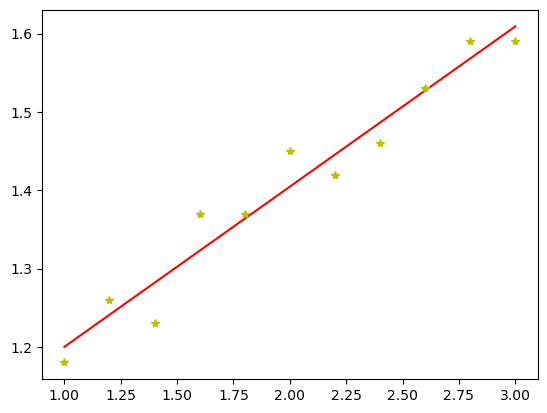

In [21]:
x = np.array([1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0])
y = np.array([1.18,1.26,1.23,1.37,1.37,1.45,1.42,1.46,1.53,1.59,1.59])
xx = np.linspace(1, 3, 200)

n = 1 # grado del polinomio
n1 = n + 1

A = np.vander(x, 2, increasing=True)
alpha = eqnorm(A, y)
print(alpha)
retta = np.polyval(np.flip(alpha), xx)

plt.plot(xx, retta, 'r-')
plt.plot(x,y,'y*')
plt.show()

- si calcola il polinomio di interpolazione dei punti assegnati sviluppando le functions necessarie e lo si valuti su 200 punti equidistanti nell'intervallo [1,3]  [**Punti: 4**]

In [14]:
# Funzioni per l'interpolazione polinomiale
def plagr(xnodi,j):
    xzeri=np.zeros_like(xnodi)
    n=xnodi.size
    if j==0:
       xzeri=xnodi[1:n]
    else:
       xzeri=np.append(xnodi[0:j], xnodi[j+1:n]) 
    
    num = np.poly(xzeri)
    den = np.polyval(num, xnodi[j]) 
    p=num/den
    
    return p

In [16]:
def InterpL(x, y, xx):
     n=x.size
     m=xx.size
     L=np.zeros((m,n))
     for j in range(n):
        p = plagr(x, j) 
        L[:,j] = np.polyval(p, xx) 

     return L@y

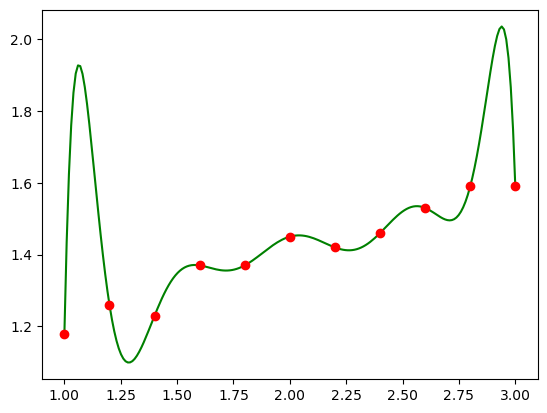

In [15]:
vet_interpl = InterpL(x, y, xx)
plt.plot(xx,vet_interpl,'-g')
plt.plot(x,y,'ro')

- Si modifichino le ordinate dei punti assegnati, facendo uso della formula   $\hat{y_i}=2*x_i+1$, $i=1,...,11$, e si ricalcoli il polinomio interpolante ed il polinomio di approssimazione di grado 1, a partire dalle coppie $(x_i,\hat{y_i})$, $i=1,11$   [**Punti: 1**]

In [ ]:
yi = 2*x + 1
pol_interpl = InterpL(x,  yi, xx)

- Si visualizzi in un grafico il polinomio interpolante, il polinomio di approssimazione di grado 1 ed i punti $(x_i,y_i)$, i=1,11 ed in un altro grafico il polinomio interpolante, il polinomio di approssimazione di grado 1 ed i $(x_i,\hat{y_i})$, $i=1,11$  [**Punti:1**]

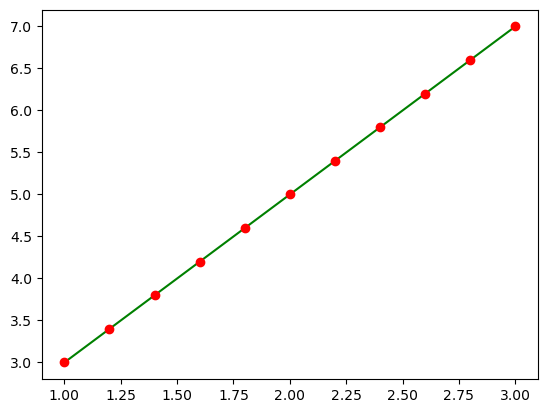

In [ ]:
plt.plot(xx, pol_interpl, '-g')
plt.plot(x, yi, 'ro')
plt.show()

- Si fornisca una spiegazione teorica dei risultati ottenuti
  [**Punti: 4**]

Per quel che riguarda il polinomio interpolante, dal grafico si notano ampie oscillazioni agli estremi dell'intervallo. Infatti, ciò accade quando si scelgono coordinate equispaziate: si ha la convergenza alla soluzione al centro dell'intervallo e ampie oscillazioni agli estremi.

Per le coppie (x, y cappello), il polinimio interpolatore risulta lineare.

                                                                        Totale 14 punti

## Domanda intelligenza artificiale

- Importanza del learning rate nell'allenamento di una rete neurale 
[**Punti: 1**]
- Illustra l'algoritmo di backpropagation per il calcolo delle derivate parziale della funzione costo rispetto ai pesi di tutti i layer, nel caso di una MLP con 1 nodo di input, 3 layer nascosti formati da un solo nodo, ed 1 nodo di output. [**Punti: 4**] 
 
- Tecniche di Ottimizzazione: metodo di discesa del gradient batch, metodo del gradiente stocastico (SGD) ,metodo del gradiente stocastico minibatch. [**Punti: 2**]


    [**Totale: punti 7**]


#### 1. Importanza del learning rate nell'allenamento di una rete neurale
Il learning rate è uno degli iperparametri fondamentali per l'addestramento di una rete neurale. Valori troppo alti di learning rate fanno sì che non si giunga mai alla convergenza alla soluzione del problema, mentre valori troppo bassi determinano la convergenza alla soluzione in un numero di iterazioni troppo elevate. Dunque, si dovrebbe optare per un learning rate dinamico, con valore medio-alto in fase iniziale di ricerca per elevati aggiornamenti, e valore basso nella fase finale.

Il valore di learning rate coincide con lo step size alfa del metodo del gradiente.

#### 3. Tecniche di Ottimizzazione: metodo di discesa del gradient batch, metodo del gradiente stocastico (SGD) ,metodo del gradiente stocastico minibatch. 

Metodo di discesa del gradiente batch: il calcolo della funzione costo avviene tramite una fase di forward propagation dell'intero training set, per poi aggiornare i parametri con una fase di backward propagation. Quindi, i dati vengono aggiornati una singola volta.

Metodo del gradiente stocastico: si tratta di un algoritmo per minimizzare la funzione di costo di una rete aggiornando i pesi in modo iterativo tramite backward propagation.
 
Metodo del gradiente minibatch: si considera un sottoinsieme del dataset. Il minibatch, se in totale vi sono N osservazioni, sarà composto da 1 < x < n osservazioni. Esse indicano quanti campioni far scorrere nella rete ad ogni iterazione.